> 游戏介绍

https://jingyan.baidu.com/article/00a07f3888e97382d128dc78.html

> 概念清单

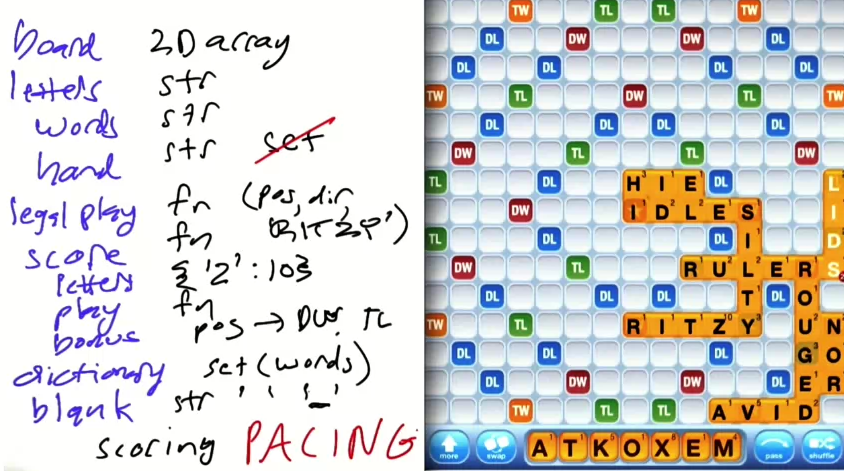
看得出来是复杂的,要一部分一部分做。保持节奏，就是保持注意力，防止沮丧
）

# 从手牌中寻找合法单词(字典里的)
最初方法： 字母 所有长度的 所有组合
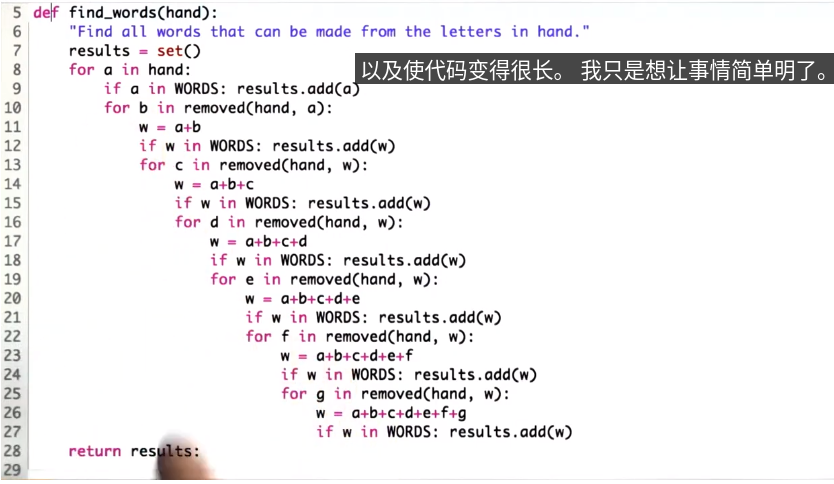
考虑前缀匹配 可以提高效率 (`zz-`没有合法单词,则`zza-`更没有)
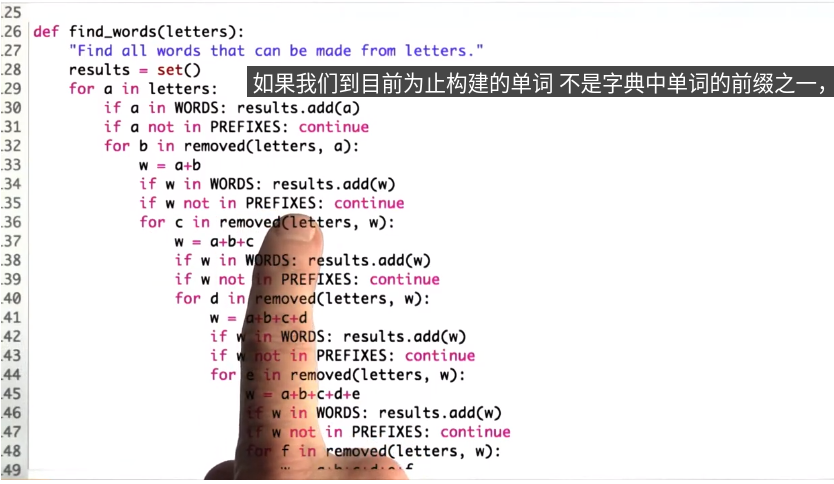

In [50]:
def prefixes(word):
    return [word[:i] for i in range(len(word))]
assert prefixes('WORD') == ['','W','WO','WOR']

In [72]:
def readwordlist(filename):
    """Read the words from a file and return a set of the words 
    and a set of the prefixes."""
    # your code here
    wordset = set(open(filename).read().upper().split())
    prefixset = {p for word in WORDS for p in prefixes(word)}
    return wordset, prefixset
    
WORDS, PREFIXES = readwordlist('words4k.txt')

def test():
    assert len(WORDS)    == 3892
    assert len(PREFIXES) == 6475
    assert 'UMIAQS' in WORDS
    assert 'MOVING' in WORDS
    assert 'UNDERSTANDIN' in PREFIXES
    assert 'ZOMB' in PREFIXES
    return 'tests pass'

test()

'tests pass'

In [133]:
'BYE' in WORDS

True

In [134]:
def find_words(letters='BYE',prefix='',results=set()):
    if prefix in WORDS: results.add(prefix)
    if prefix in PREFIXES:
        for L in letters:
            find_words(letters.replace(L,'',1),prefix+L,results)
    return results

find_words()

{'BE', 'BEY', 'BY', 'BYE', 'YE'}

> 回归测试   即使测试不全面
- 意味着当程序更改至少确保依然能通过
- 可以计时

In [122]:
# find_words 测试
import time
def timedcall(fn, *args):
    "Call function with args; return the time in seconds and result."
    t0 = time.perf_counter()
    result = fn(*args)
    t1 = time.perf_counter()
    return t1-t0, result

hands = {  ## Regression test
    'ABECEDR': set(['BE', 'CARE', 'BAR', 'BA', 'ACE', 'READ', 'CAR', 'DE', 'BED', 'BEE',
         'ERE', 'BAD', 'ERA', 'REC', 'DEAR', 'CAB', 'DEB', 'DEE', 'RED', 'CAD',
         'CEE', 'DAB', 'REE', 'RE', 'RACE', 'EAR', 'AB', 'AE', 'AD', 'ED', 'RAD',
         'BEAR', 'AR', 'REB', 'ER', 'ARB', 'ARC', 'ARE', 'BRA']),
    'AEINRST': set(['SIR', 'NAE', 'TIS', 'TIN', 'ANTSIER', 'TIE', 'SIN', 'TAR', 'TAS',
         'RAN', 'SIT', 'SAE', 'RIN', 'TAE', 'RAT', 'RAS', 'TAN', 'RIA', 'RISE',
         'ANESTRI', 'RATINES', 'NEAR', 'REI', 'NIT', 'NASTIER', 'SEAT', 'RATE',
         'RETAINS', 'STAINER', 'TRAIN', 'STIR', 'EN', 'STAIR', 'ENS', 'RAIN', 'ET',
         'STAIN', 'ES', 'ER', 'ANE', 'ANI', 'INS', 'ANT', 'SENT', 'TEA', 'ATE',
         'RAISE', 'RES', 'RET', 'ETA', 'NET', 'ARTS', 'SET', 'SER', 'TEN', 'RE',
         'NA', 'NE', 'SEA', 'SEN', 'EAST', 'SEI', 'SRI', 'RETSINA', 'EARN', 'SI',
         'SAT', 'ITS', 'ERS', 'AIT', 'AIS', 'AIR', 'AIN', 'ERA', 'ERN', 'STEARIN',
         'TEAR', 'RETINAS', 'TI', 'EAR', 'EAT', 'TA', 'AE', 'AI', 'IS', 'IT',
         'REST', 'AN', 'AS', 'AR', 'AT', 'IN', 'IRE', 'ARS', 'ART', 'ARE']),
    'DRAMITC': set(['DIM', 'AIT', 'MID', 'AIR', 'AIM', 'CAM', 'ACT', 'DIT', 'AID', 'MIR',
         'TIC', 'AMI', 'RAD', 'TAR', 'DAM', 'RAM', 'TAD', 'RAT', 'RIM', 'TI',
         'TAM', 'RID', 'CAD', 'RIA', 'AD', 'AI', 'AM', 'IT', 'AR', 'AT', 'ART',
         'CAT', 'ID', 'MAR', 'MA', 'MAT', 'MI', 'CAR', 'MAC', 'ARC', 'MAD', 'TA',
         'ARM']),
    'ADEINRST': set(['SIR', 'NAE', 'TIS', 'TIN', 'ANTSIER', 'DEAR', 'TIE', 'SIN', 'RAD', 
         'TAR', 'TAS', 'RAN', 'SIT', 'SAE', 'SAD', 'TAD', 'RE', 'RAT', 'RAS', 'RID',
         'RIA', 'ENDS', 'RISE', 'IDEA', 'ANESTRI', 'IRE', 'RATINES', 'SEND',
         'NEAR', 'REI', 'DETRAIN', 'DINE', 'ASIDE', 'SEAT', 'RATE', 'STAND',
         'DEN', 'TRIED', 'RETAINS', 'RIDE', 'STAINER', 'TRAIN', 'STIR', 'EN',
         'END', 'STAIR', 'ED', 'ENS', 'RAIN', 'ET', 'STAIN', 'ES', 'ER', 'AND',
         'ANE', 'SAID', 'ANI', 'INS', 'ANT', 'IDEAS', 'NIT', 'TEA', 'ATE', 'RAISE',
         'READ', 'RES', 'IDS', 'RET', 'ETA', 'INSTEAD', 'NET', 'RED', 'RIN',
         'ARTS', 'SET', 'SER', 'TEN', 'TAE', 'NA', 'TED', 'NE', 'TRADE', 'SEA',
         'AIT', 'SEN', 'EAST', 'SEI', 'RAISED', 'SENT', 'ADS', 'SRI', 'NASTIER',
         'RETSINA', 'TAN', 'EARN', 'SI', 'SAT', 'ITS', 'DIN', 'ERS', 'DIE', 'DE',
         'AIS', 'AIR', 'DATE', 'AIN', 'ERA', 'SIDE', 'DIT', 'AID', 'ERN',
         'STEARIN', 'DIS', 'TEAR', 'RETINAS', 'TI', 'EAR', 'EAT', 'TA', 'AE',
         'AD', 'AI', 'IS', 'IT', 'REST', 'AN', 'AS', 'AR', 'AT', 'IN', 'ID', 'ARS',
         'ART', 'ANTIRED', 'ARE', 'TRAINED', 'RANDIEST', 'STRAINED', 'DETRAINS']),
    'ETAOIN': set(['ATE', 'NAE', 'AIT', 'EON', 'TIN', 'OAT', 'TON', 'TIE', 'NET', 'TOE',
         'ANT', 'TEN', 'TAE', 'TEA', 'AIN', 'NE', 'ONE', 'TO', 'TI', 'TAN',
         'TAO', 'EAT', 'TA', 'EN', 'AE', 'ANE', 'AI', 'INTO', 'IT', 'AN', 'AT',
         'IN', 'ET', 'ON', 'OE', 'NO', 'ANI', 'NOTE', 'ETA', 'ION', 'NA', 'NOT',
         'NIT']),
    'SHRDLU': set(['URD', 'SH', 'UH', 'US']),
    'SHROUDT': set(['DO', 'SHORT', 'TOR', 'HO', 'DOR', 'DOS', 'SOUTH', 'HOURS', 'SOD',
         'HOUR', 'SORT', 'ODS', 'ROD', 'OUD', 'HUT', 'TO', 'SOU', 'SOT', 'OUR',
         'ROT', 'OHS', 'URD', 'HOD', 'SHOT', 'DUO', 'THUS', 'THO', 'UTS', 'HOT',
         'TOD', 'DUST', 'DOT', 'OH', 'UT', 'ORT', 'OD', 'ORS', 'US', 'OR',
         'SHOUT', 'SH', 'SO', 'UH', 'RHO', 'OUT', 'OS', 'UDO', 'RUT']),
    'TOXENSI': set(['TO', 'STONE', 'ONES', 'SIT', 'SIX', 'EON', 'TIS', 'TIN', 'XI', 'TON',
         'ONE', 'TIE', 'NET', 'NEXT', 'SIN', 'TOE', 'SOX', 'SET', 'TEN', 'NO',
         'NE', 'SEX', 'ION', 'NOSE', 'TI', 'ONS', 'OSE', 'INTO', 'SEI', 'SOT',
         'EN', 'NIT', 'NIX', 'IS', 'IT', 'ENS', 'EX', 'IN', 'ET', 'ES', 'ON',
         'OES', 'OS', 'OE', 'INS', 'NOTE', 'EXIST', 'SI', 'XIS', 'SO', 'SON',
         'OX', 'NOT', 'SEN', 'ITS', 'SENT', 'NOS'])}

def test_words():
    t, results = timedcall(map, find_words, hands)
    for ((hand, expected), got) in zip(hands.items(), results):
        assert got == expected, "For %r: got %s, expected %s (diff %s)" % (
            hand, got, expected, expected ^ got)
    return f'{t:.10f}'

In [111]:
test_words()

'0.0000007090'